# Predicitng College Basketball Teams Total Wins using Linear Regression 

## Importing Libraries 

In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from statsmodels.formula.api import ols
%matplotlib inline

## Loading in Dataset

In [9]:
file = 'file:///Users/chrisfiorentine/Downloads/college-basketball-dataset%20(1)/cbb.csv'

### Turn Dataset into DataFrame

In [113]:
df = pd.read_csv(file)
df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1752,Texas A&M,SEC,35,22,111.2,94.7,0.8640,51.4,46.9,19.2,...,27.6,52.5,45.7,32.9,32.6,70.3,1.9,S16,7.0,2018
1753,LSU,SEC,35,28,117.9,96.6,0.9081,51.2,49.9,17.9,...,33.1,52.9,49.4,31.9,33.7,71.2,7.3,S16,3.0,2019
1754,Tennessee,SEC,36,31,122.8,95.2,0.9488,55.3,48.1,15.8,...,34.9,55.4,44.7,36.7,35.4,68.8,9.9,S16,2.0,2019
1755,Gonzaga,WCC,35,27,117.4,94.5,0.9238,55.2,44.8,17.1,...,28.1,54.3,44.4,37.8,30.3,68.2,2.1,S16,11.0,2016


## Exploring Dataset

### Showing Dscriptive Statistics 

In [12]:
df.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
count,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,...,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,1757.000000,340.000000,1757.000000
mean,31.523051,16.513375,103.542402,103.542459,0.493398,50.120489,50.312806,18.591804,18.521286,29.277120,...,35.097894,35.373307,49.135970,49.298065,34.563517,34.744792,68.422254,-7.837109,8.791176,2017.002277
std,2.602819,6.545571,7.304975,6.472676,0.255291,3.130430,2.859604,1.991637,2.108968,4.101782,...,4.884599,5.900935,3.422136,3.288265,2.742323,2.369727,3.258920,6.988694,4.674090,1.415419
min,24.000000,0.000000,76.700000,84.000000,0.007700,39.400000,39.600000,12.400000,10.200000,15.000000,...,21.600000,21.800000,37.700000,37.700000,25.200000,27.100000,57.200000,-25.200000,1.000000,2015.000000
25%,30.000000,12.000000,98.600000,98.900000,0.283700,48.100000,48.400000,17.200000,17.100000,26.600000,...,31.700000,31.200000,46.900000,47.100000,32.600000,33.100000,66.400000,-13.000000,5.000000,2016.000000
50%,31.000000,16.000000,103.100000,103.800000,0.474000,50.000000,50.300000,18.500000,18.500000,29.400000,...,34.900000,34.900000,49.000000,49.300000,34.600000,34.700000,68.500000,-8.400000,9.000000,2017.000000
75%,33.000000,21.000000,108.100000,108.000000,0.710600,52.100000,52.300000,19.800000,19.900000,31.900000,...,38.300000,39.200000,51.400000,51.500000,36.400000,36.300000,70.400000,-3.100000,13.000000,2018.000000
max,40.000000,38.000000,129.100000,124.000000,0.984200,59.800000,59.500000,26.100000,28.000000,42.100000,...,51.000000,58.500000,62.600000,61.200000,44.100000,43.100000,83.400000,13.100000,16.000000,2019.000000


### Showing Bow Big Dataset is

In [14]:
df.shape #1757 rows 24 columns 

(1757, 24)

In [395]:
df.isnull().any() # Checking for any null values 

TEAM          False
CONF          False
G             False
W             False
ADJOE         False
ADJDE         False
BARTHAG       False
EFG_O         False
EFG_D         False
TOR           False
TORD          False
ORB           False
DRB           False
FTR           False
FTRD          False
2P_O          False
2P_D          False
3P_O          False
3P_D          False
ADJ_T         False
WAB           False
POSTSEASON     True
SEED           True
YEAR          False
dtype: bool

## Key for columns 

G = Games   
W = Wins   
ADJOE = Adjusted Offensive Efficency   
ADJDE = Adjusted Defensive Efficency  
BARTHAG = Power Rating (Chance of beating an average Division I team)  
EFG_O = Effective Field Goal Percentage Shot  
EFG_D = Effective Field Goal Percentage Allowed  
TOR = Turnover Percentage Allowed (Turnover Rate)  
TORD = Turnover Percentage Committed (Steal Rate)  
ORB = Offensive Rebound Percentage  
DRB = Defensive Rebound Percentage  
FTR = Free Throw Rate (How often the given team shoots Free Throws)  
FTRD = Free Throw Rate Allowed  
2P_O = Two-Point Shooting Percentage  
2P_D = Two-Point Shooting Percentage Allowed  
3P_O = Three-Point Shooting Percentage  
3P_D = Three-Point Shooting Percentage Allowed  
ADJ_T = Adjusted Tempo (An estimate of the tempo (possessions per 40 minutes) a team would have against the team that wants to play at an)  
WAB = Wins Above Bubble (The bubble refers to the cut off between making the NCAA March Madness Tournament and not making it)  
POSTSEASON = Round where the given team was eliminated or where their season ended  
SEED = Seed in the NCAA March Madness Tournament  
YEAR = Season

## Exploring Descriptive Statistics for Dependent and Independent Variables for All Years 

Very important to see how the data changes from year to year. If the data changes significantly, it may be a result of how the game has changed from year to year. This may be due to a rule changes, coaching styles, or other factors. If descriptive statistics show that the game has changed significantly, it may be the result of a time series and data may be invalid. 

### Loading Datasets for every year 

In [16]:
csv_2015 = pd.read_csv('file:///Users/chrisfiorentine/Downloads/college-basketball-dataset%20(1)/cbb15.csv')
csv_2016 = pd.read_csv('file:///Users/chrisfiorentine/Downloads/college-basketball-dataset%20(1)/cbb16.csv')
csv_2017 = pd.read_csv('file:///Users/chrisfiorentine/Downloads/college-basketball-dataset%20(1)/cbb17.csv')
csv_2018 = pd.read_csv('file:///Users/chrisfiorentine/Downloads/college-basketball-dataset%20(1)/cbb18.csv')
csv_2019 = pd.read_csv('file:///Users/chrisfiorentine/Downloads/college-basketball-dataset%20(1)/cbb19.csv')

### Turning Datasets into Data Frames

In [17]:
df_2015 = pd.DataFrame(csv_2015)
df_2016 = pd.DataFrame(csv_2016)
df_2017 = pd.DataFrame(csv_2017)
df_2018 = pd.DataFrame(csv_2018)
df_2019 = pd.DataFrame(csv_2019)

### Wins Stats Over all Years

In [18]:
wins_stats_2015 = df_2015['W'].describe() 
df_wins_stats_2015 = pd.DataFrame(wins_stats_2015)

In [19]:
wins_stats_2016 = df_2016['W'].describe()
df_wins_stats_2016 = pd.DataFrame(wins_stats_2016)

In [20]:
wins_stats_2017 = df_2017['W'].describe()
df_wins_stats_2017 = pd.DataFrame(wins_stats_2017)

In [21]:
wins_stats_2018 = df_2018['W'].describe()
df_wins_stats_2018 = pd.DataFrame(wins_stats_2018)

In [22]:
wins_stats_2019 = df_2019['W'].describe()
df_wins_stats_2019 = pd.DataFrame(wins_stats_2019)

In [23]:
wins_stats = df['W'].describe()
df_wins_stats = pd.DataFrame(wins_stats) #Stats for wins over all years

In [97]:
df_all_wins_stats = pd.concat([df_wins_stats_2015,df_wins_stats_2016, df_wins_stats_2017,df_wins_stats_2018,df_wins_stats_2019,df_wins_stats], axis = 1)
df_all_wins_stats # Combining all data frames on one data frame in order from 2015 to 2019 then all years

,W,W,W,W,W,W
count,351.000000,351.000000,351.000000,351.000000,353.000000,1757.000000
mean,15.666667,15.712251,17.002849,17.068376,17.113314,16.513375
std,6.698401,6.686006,6.456226,6.368305,6.374993,6.545571
min,0.000000,1.000000,2.000000,3.000000,3.000000,0.000000
25%,11.000000,10.000000,12.000000,12.000000,12.000000,12.000000
50%,15.000000,16.000000,17.000000,17.000000,17.000000,16.000000
75%,20.000000,21.000000,21.000000,21.000000,21.000000,21.000000
max,38.000000,35.000000,37.000000,36.000000,35.000000,38.000000


Average wins is fairly consistent over all years giving an average of about 16.5 wins per team 

### Games Played Stats

Important to show all seasons play the same amount of games 

In [27]:
games_stats = df['G'].describe()
df_game_stats = pd.DataFrame(games_stats) #Stats for all years

In [37]:
games_stats_2015 = df_2015['G'].describe()
df_game_stats_2015 = pd.DataFrame(games_stats_2015)

In [36]:
games_stats_2016 = df_2016['G'].describe()
df_game_stats_2016 = pd.DataFrame(games_stats_2016)

In [35]:
games_stats_2017 = df_2017['G'].describe()
df_game_stats_2017 = pd.DataFrame(games_stats_2017)

In [34]:
games_stats_2018 = df_2018['G'].describe()
df_game_stats_2018 = pd.DataFrame(games_stats_2018)

In [33]:
games_stats_2019 = df_2019['G'].describe()
df_game_stats_2019 = pd.DataFrame(games_stats_2019)

In [96]:
df_all_game_stats = pd.concat([df_game_stats_2015,df_game_stats_2016, df_game_stats_2017,df_game_stats_2018,df_game_stats_2019,df_game_stats], axis = 1)
df_all_game_stats # Combining all data frames on one data frame in order from 2015 to 2019 then all years

,G,G,G,G,G,G
count,351.000000,351.000000,351.000000,351.000000,353.000000,1757.000000
mean,31.333333,31.430199,31.538462,31.566952,31.745042,31.523051
std,2.660827,2.606607,2.611639,2.615436,2.514195,2.602819
min,24.000000,24.000000,25.000000,24.000000,26.000000,24.000000
25%,29.000000,30.000000,30.000000,30.000000,30.000000,30.000000
50%,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
75%,33.000000,33.000000,33.000000,33.000000,33.000000,33.000000
max,40.000000,40.000000,39.000000,40.000000,39.000000,40.000000


All seasons had about an average of about 31 games played each year with a total average of 31.5

### ADJOE Stats 

Adjusted Offensive Efficency 

In [43]:
adjoe_stats = df['ADJOE'].describe()
df_adjoe_stats = pd.DataFrame(adjoe_stats) #Stats for all years

In [44]:
adjoe_stats_2015 = df_2015['ADJOE'].describe()
df_adjoe_stats_2015 = pd.DataFrame(adjoe_stats_2015)

In [45]:
adjoe_stats_2016 = df_2016['ADJOE'].describe()
df_adjoe_stats_2016 = pd.DataFrame(adjoe_stats_2016)

In [46]:
adjoe_stats_2017 = df_2017['ADJOE'].describe()
df_adjoe_stats_2017 = pd.DataFrame(adjoe_stats_2017)

In [47]:
adjoe_stats_2018 = df_2018['ADJOE'].describe()
df_adjoe_stats_2018 = pd.DataFrame(adjoe_stats_2018)

In [48]:
adjoe_stats_2019 = df_2019['ADJOE'].describe()
df_adjoe_stats_2019 = pd.DataFrame(adjoe_stats_2019)

In [95]:
df_all_adjoe_stats = pd.concat([df_adjoe_stats_2015,df_adjoe_stats_2016, df_adjoe_stats_2017,df_adjoe_stats_2018,df_adjoe_stats_2019,df_adjoe_stats], axis = 1)
df_all_adjoe_stats # Combining all data frames on one data frame in order from 2015 to 2019 then all years 

,ADJOE,ADJOE,ADJOE,ADJOE,ADJOE,ADJOE
count,351.000000,351.000000,351.000000,351.000000,353.000000,1757.000000
mean,102.315385,103.866382,103.840456,104.354986,103.335977,103.542402
std,7.401505,7.462340,7.334709,7.175631,7.020019,7.304975
min,76.700000,82.900000,84.000000,86.200000,83.700000,76.700000
25%,97.900000,99.050000,98.850000,99.050000,98.600000,98.600000
50%,102.100000,103.200000,103.100000,104.100000,103.100000,103.100000
75%,106.500000,109.000000,108.300000,108.800000,107.700000,108.100000
max,129.100000,123.300000,126.800000,128.400000,123.400000,129.100000


ADJOE is consistent over all years with a total average ADJOE of about 103.5

### ADJDE Stats 

Adjusted Defensive Efficency 

In [53]:
df_adjde_stats = pd.DataFrame(df['ADJDE'].describe()) #Stats for all years

In [54]:
adjde_stats_2015 = df_2015['ADJDE'].describe()
df_adjde_stats_2015 = pd.DataFrame(adjde_stats_2015)

In [55]:
adjde_stats_2016 = df_2016['ADJDE'].describe()
df_adjde_stats_2016 = pd.DataFrame(adjde_stats_2016)

In [56]:
adjde_stats_2017 = df_2017['ADJDE'].describe()
df_adjde_stats_2017 = pd.DataFrame(adjde_stats_2017)

In [57]:
adjde_stats_2018 = df_2018['ADJDE'].describe()
df_adjde_stats_2018 = pd.DataFrame(adjde_stats_2018)

In [58]:
adjde_stats_2019 = df_2019['ADJDE'].describe()
df_adjde_stats_2019 = pd.DataFrame(adjde_stats_2019)

In [94]:
df_all_adjde_stats = pd.concat([df_adjde_stats_2015,df_adjde_stats_2016, df_adjde_stats_2017,df_adjde_stats_2018,df_adjde_stats_2019,df_adjde_stats], axis = 1)
df_all_adjde_stats # Combining all data frames on one data frame in order from 2015 to 2019 then all years

,ADJDE,ADJDE,ADJDE,ADJDE,ADJDE,ADJDE
count,351.000000,351.000000,351.000000,351.000000,353.000000,1757.000000
mean,102.311681,103.866382,103.841880,104.357265,103.336261,103.542459
std,6.537436,6.325834,6.591266,6.300789,6.452597,6.472676
min,84.000000,87.800000,86.300000,86.700000,85.200000,84.000000
25%,97.750000,99.100000,99.500000,99.850000,98.700000,98.900000
50%,102.600000,103.800000,103.700000,104.400000,104.000000,103.800000
75%,107.100000,108.400000,108.250000,108.300000,107.800000,108.000000
max,120.000000,118.200000,124.000000,123.000000,119.200000,124.000000


ADJDE is consistent over all years with a total average ADJDE of about 103.5

### Tempo Stats

Important to see if the pace of the games played stays consistent for all years as it may be a result of rule change, different coaching styles or other factors resulting in a time series affecting the data and making the data invalid.

In [62]:
df_tempo_stats = pd.DataFrame(df['ADJ_T'].describe()) #Stats for all years

In [67]:
df_tempo_stats_2015 = pd.DataFrame(df_2015['ADJ_T'].describe()) # Same code as before just written in one line

In [68]:
df_tempo_stats_2016 = pd.DataFrame(df_2016['ADJ_T'].describe())

In [69]:
df_tempo_stats_2017 = pd.DataFrame(df_2017['ADJ_T'].describe())

In [70]:
df_tempo_stats_2018 = pd.DataFrame(df_2018['ADJ_T'].describe())

In [71]:
df_tempo_stats_2019 = pd.DataFrame(df_2019['ADJ_T'].describe())

In [93]:
df_all_tempo_stats = pd.concat([df_tempo_stats_2015,df_tempo_stats_2016, df_tempo_stats_2017,df_tempo_stats_2018,df_tempo_stats_2019,df_tempo_stats], axis = 1)
df_all_tempo_stats # Combining all data frames on one data frame in order from 2015 to 2019 then all years

,ADJ_T,ADJ_T,ADJ_T,ADJ_T,ADJ_T,ADJ_T
count,351.000000,351.000000,351.000000,351.000000,353.000000,1757.000000
mean,64.936467,69.100855,69.481766,69.419373,69.168555,68.422254
std,2.686141,2.780478,2.917897,2.681646,2.694397,3.258920
min,57.200000,61.900000,60.300000,60.500000,60.700000,57.200000
25%,63.300000,67.200000,67.700000,67.500000,67.300000,66.400000
50%,64.900000,68.900000,69.600000,69.400000,69.000000,68.500000
75%,66.600000,70.850000,71.100000,71.000000,70.800000,70.400000
max,77.300000,81.900000,83.300000,83.400000,79.100000,83.400000


2015 has an average tempo of 64 possensions per game where every other year has average of 69.   
Shown later in hypothesis test to see if 2015 tempo is statistcally different enough to rule out. 

#### NOTE 

A rule-change after the 2015 had a direct affect on the tempo of the game. The rule-change changed the shot clock from 35 to 30 seconds. This means that each time the possesion changes, the team with the ball has a maximun of 30 seconds to shoot the ball instead of 35. This sped up the game and changed the tempo. Before the rule-change, teams averaged about 65 possesions per 40 minutes. After the rule-change, speeding up the shotclock, the average posseions per game spiked to 69 per 40 minutes as seen in the data.   

### Turnover Stats

Turnover Rate

In [76]:
df_tor_stats = pd.DataFrame(df['TOR'].describe()) #Stats for all years

In [77]:
df_tor_stats_2015 = pd.DataFrame(df_2015['TOR'].describe())

In [78]:
df_tor_stats_2016 = pd.DataFrame(df_2016['TOR'].describe())

In [79]:
df_tor_stats_2017 = pd.DataFrame(df_2017['TOR'].describe())

In [80]:
df_tor_stats_2018 = pd.DataFrame(df_2018['TOR'].describe())

In [81]:
df_tor_stats_2019 = pd.DataFrame(df_2019['TOR'].describe())

In [82]:
df_all_tor_stats = pd.concat([df_tor_stats_2015,df_tor_stats_2016, df_tor_stats_2017,df_tor_stats_2018,df_tor_stats_2019,df_tor_stats], axis = 1)
df_all_tor_stats # Combining all data frames on one data frame in order from 2015 to 2019 then all years

,TOR,TOR,TOR,TOR,TOR,TOR
count,351.000000,351.000000,351.000000,351.000000,353.000000,1757.000000
mean,19.125641,18.184046,18.594017,18.448718,18.606516,18.591804
std,2.070562,1.898790,1.893913,1.911168,2.066711,1.991637
min,12.400000,13.600000,13.900000,13.500000,13.500000,12.400000
25%,17.800000,16.800000,17.400000,17.200000,17.200000,17.200000
50%,19.200000,18.100000,18.500000,18.500000,18.500000,18.500000
75%,20.300000,19.450000,19.800000,19.600000,19.800000,19.800000
max,26.100000,25.400000,25.900000,24.700000,25.100000,26.100000


Turnover Rate is consistent over all years with a total average Turnover Rate of about 18.6

### Free Throw Statistics

Free Throw Rate

In [83]:
df_ft_stats = pd.DataFrame(df['FTR'].describe()) #Stats for all years

In [86]:
df_ft_stats_2015 = pd.DataFrame(df_2015['FTR'].describe())

In [87]:
df_ft_stats_2016 = pd.DataFrame(df_2016['FTR'].describe())

In [88]:
df_ft_stats_2017 = pd.DataFrame(df_2017['FTR'].describe())

In [89]:
df_ft_stats_2018 = pd.DataFrame(df_2018['FTR'].describe())

In [90]:
df_ft_stats_2019 = pd.DataFrame(df_2019['FTR'].describe())

In [92]:
df_all_ft_stats = pd.concat([df_ft_stats_2015,df_ft_stats_2016, df_ft_stats_2017,df_ft_stats_2018,df_ft_stats_2019,df_ft_stats], axis = 1)
df_all_ft_stats # Combining all data frames on one data frame in order from 2015 to 2019 then all years

,FTR,FTR,FTR,FTR,FTR,FTR
count,351.000000,351.000000,351.000000,351.000000,353.000000,1757.000000
mean,37.043305,36.638177,35.328205,33.537607,32.954391,35.097894
std,4.747210,4.610320,4.493351,4.485782,4.708719,4.884599
min,26.100000,25.500000,24.000000,21.600000,21.900000,21.600000
25%,33.550000,33.300000,32.450000,30.400000,29.900000,31.700000
50%,36.600000,36.800000,35.100000,33.300000,33.300000,34.900000
75%,40.300000,40.200000,38.250000,36.450000,35.900000,38.300000
max,51.000000,49.400000,46.000000,45.800000,48.100000,51.000000


Free Throw Rate steadily drops each year from 37 to 32.95 with an average Free Throw Rate of 35 

### Offensive Rebound Statistics 

Offensive Rebound Rate

In [132]:
df_ORB_stats = pd.DataFrame(df['ORB'].describe()) #Stats for all years 

In [133]:
df_ORB_stats_2015 = pd.DataFrame(df_2015['ORB'].describe())

In [134]:
df_ORB_stats_2016 = pd.DataFrame(df_2016['ORB'].describe())

In [135]:
df_ORB_stats_2017 = pd.DataFrame(df_2017['ORB'].describe())

In [136]:
df_ORB_stats_2018 = pd.DataFrame(df_2018['ORB'].describe())

In [137]:
df_ORB_stats_2019 = pd.DataFrame(df_2019['ORB'].describe())

In [138]:
df_all_ORB_stats = pd.concat([df_ORB_stats_2015,df_ORB_stats_2016, df_ORB_stats_2017,df_ORB_stats_2018,df_ORB_stats_2019,df_ORB_stats], axis = 1)
df_all_ORB_stats # Combining all data frames on one data frame in order from 2015 to 2019 then all years

,ORB,ORB,ORB,ORB,ORB,ORB
count,351.000000,351.000000,351.000000,351.000000,353.000000,1757.000000
mean,30.862963,29.618234,29.120798,28.543590,28.245892,29.277120
std,3.943029,4.109475,4.088345,3.922602,3.938373,4.101782
min,19.300000,17.700000,15.000000,18.000000,15.900000,15.000000
25%,28.650000,26.950000,26.750000,25.900000,25.400000,26.600000
50%,30.800000,29.600000,29.300000,28.700000,28.300000,29.400000
75%,33.700000,32.200000,31.600000,31.300000,31.000000,31.900000
max,42.100000,42.000000,41.300000,38.800000,38.700000,42.100000


Offensive Rebound Rate is consistent over all years with average of 29.3

### Defensive Rebound Stats

Defensive Rebound Rate

In [126]:
df_DRB_stats = pd.DataFrame(df['DRB'].describe()) #Stats for all years 

In [127]:
df_DRB_stats_2015 = pd.DataFrame(df_2015['DRB'].describe())

In [128]:
df_DRB_stats_2016 = pd.DataFrame(df_2016['DRB'].describe())

In [129]:
df_DRB_stats_2017 = pd.DataFrame(df_2017['DRB'].describe())

In [130]:
df_DRB_stats_2018 = pd.DataFrame(df_2018['DRB'].describe())

In [131]:
df_DRB_stats_2019 = pd.DataFrame(df_2019['ORB'].describe())

In [139]:
df_all_DRB_stats = pd.concat([df_DRB_stats_2015,df_DRB_stats_2016, df_DRB_stats_2017,df_DRB_stats_2018,df_DRB_stats_2019,df_DRB_stats], axis = 1)
df_all_DRB_stats # Combining all data frames on one data frame in order from 2015 to 2019 then all years

,DRB,DRB,DRB,DRB,ORB,DRB
count,351.000000,351.000000,351.000000,351.000000,353.000000,1757.000000
mean,31.090028,29.821083,29.298575,28.713105,28.245892,29.467445
std,2.912875,2.873775,2.869380,2.998533,3.938373,3.061786
min,22.400000,21.700000,21.700000,18.400000,15.900000,18.400000
25%,29.200000,27.900000,27.300000,26.850000,25.400000,27.300000
50%,31.200000,29.800000,29.300000,28.700000,28.300000,29.400000
75%,32.900000,31.500000,31.250000,30.700000,31.000000,31.500000
max,40.400000,38.800000,37.600000,37.800000,38.700000,40.400000


Defensive Rebound Rate is fairly consistent over all years with a total average of 29.5

#### Note found in descriptive statistics 

The count(number of teams) for 2019 is 353 and every other year is 351. 2 teams were added in 2019. However, this will not affect the model and they will be added into the model. This is okay to do because the stats taken from the games those teams played will still help the model to predict wins. 

## Trimming Down Data

### Avoiding Multicollinearity

Multicollinearity is important to avoid because we do not want to add unnecessary variables to our model. If we do not check for multicollinearity in our variables, it may lead to a large number of coefficents and may confuse our model. 

In [142]:
df.corr() # Displays how each column is correlated with each other in a Data Frame

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,...,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,SEED,YEAR
G,1.000000,0.708838,0.613432,-0.606166,0.688059,0.346425,-0.481942,-0.336407,0.065020,0.261046,...,0.090549,-0.279593,0.339290,-0.439340,0.225821,-0.349726,-0.040433,0.666595,-0.607807,0.052233
W,0.708838,1.000000,0.754532,-0.690753,0.814512,0.617839,-0.609144,-0.467073,0.138805,0.296395,...,0.126931,-0.329245,0.585806,-0.529558,0.432743,-0.485485,-0.016057,0.905029,-0.612284,0.091829
ADJOE,0.613432,0.754532,1.000000,-0.528576,0.870686,0.732683,-0.333693,-0.601024,-0.116231,0.261351,...,0.063637,-0.382290,0.646011,-0.328822,0.579193,-0.198275,0.070476,0.851663,-0.791692,0.048861
ADJDE,-0.606166,-0.690753,-0.528576,1.000000,-0.852432,-0.221381,0.792320,0.219779,-0.234615,-0.294066,...,-0.125265,0.180823,-0.251354,0.728488,-0.102715,0.564135,0.227852,-0.809486,0.706046,0.055367
BARTHAG,0.688059,0.814512,0.870686,-0.852432,1.000000,0.543153,-0.627696,-0.472329,0.054377,0.310917,...,0.112072,-0.327932,0.512045,-0.588121,0.386597,-0.427750,-0.079611,0.941776,-0.832709,0.000228
EFG_O,0.346425,0.617839,0.732683,-0.221381,0.543153,1.000000,-0.120335,-0.367975,-0.144287,-0.147990,...,-0.083514,-0.404445,0.893530,-0.104079,0.763028,-0.100545,0.120142,0.562904,-0.275137,0.196195
EFG_D,-0.481942,-0.609144,-0.333693,0.792320,-0.627696,-0.120335,1.000000,0.101070,-0.020831,-0.341636,...,-0.205807,0.107161,-0.148439,0.907933,-0.043770,0.722404,0.273412,-0.629864,0.386928,0.211657
TOR,-0.336407,-0.467073,-0.601024,0.219779,-0.472329,-0.367975,0.101070,1.000000,0.103437,0.134433,...,0.161369,0.316898,-0.288945,0.091686,-0.333397,0.066363,-0.102687,-0.470286,0.291587,-0.054840
TORD,0.065020,0.138805,-0.116231,-0.234615,0.054377,-0.144287,-0.020831,0.103437,1.000000,0.118496,...,0.111844,0.392412,-0.079076,0.027203,-0.177276,-0.106798,-0.065216,0.094765,0.057411,-0.051754
ORB,0.261046,0.296395,0.261351,-0.294066,0.310917,-0.147990,-0.341636,0.134433,0.118496,1.000000,...,0.280598,0.136233,-0.091259,-0.341291,-0.143735,-0.197189,-0.105308,0.332275,-0.314659,-0.217610


### Notes found in correlation

ADJOE and EFG_O have a correlation of 0.73. This correlation is too close to use in the same model. Since ADJOE has a closer correlation to Wins, ADJOE will be used in the model.  
ADJDE and EFG_D have a correlation of 0.79. ADJDE and 2P_D have a correlation of 0.73. These correlations are too close to use in the same model. Since ADJDE has the closest correlation to Wins, ADJDE will be used in the model.  

### Dropping Multicollinear Columns 

In [146]:
df2 = df.drop(['EFG_O', 'EFG_D', '2P_D'], axis = 1)
df2.shape # 21 columns

(1757, 21)

### Dropping non useful columns 

WAB, BARTHAG and SEED are not useful because these numbers are calculated from wins.  
POSTSEASON and CONF are also not useful because they cannot be used to help the model. 

In [149]:
df3 = df2.drop(['WAB','BARTHAG','SEED','POSTSEASON', 'CONF'], axis = 1)
df3.shape # 16 columns

(1757, 16)

## Simple Linear Regression Model

### Predicting Wins with ADJOE 

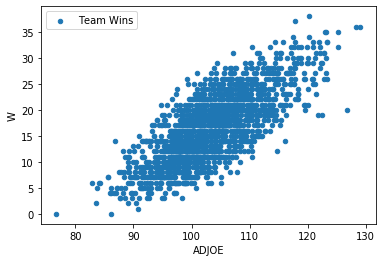

In [273]:
df3.plot.scatter(x = 'ADJOE', y = 'W', label = 'Team Wins') # Scatter plot to display on the same graph

In [401]:
lr_model = ols(formula='W~ADJOE', data=df3).fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     2320.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):          2.47e-323
Time:                        07:21:54   Log-Likelihood:                -5053.6
No. Observations:                1757   AIC:                         1.011e+04
Df Residuals:                    1755   BIC:                         1.012e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -53.4909      1.457    -36.713      0.000     -56.349     -50.633
ADJOE          0.6761      0.014     48.166      0.000       0.649       0.704
==============================================================================
Omnibus:                       18.637   Durbin-Watson:                   1.591
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               14.186
Skew:                           0.124   Prob(JB):                     0.000831
Kurtosis:                       2.636   Cond. No.                     1.48e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.48e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R Squared is 0.569**

In [274]:
X = df3['ADJOE'].values.reshape(-1,1)
Y = df3['W'].values.reshape(-1,1)

In [275]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0) # 80% of data is used to train model and 20% used to test model

In [276]:
lr = LinearRegression()

In [277]:
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [278]:
print(lr.coef_) 

[[0.66133474]]


In [279]:
print(lr.intercept_)

[-51.95429045]


In [260]:
wins_pred_adjoe = (lr.predict(X_test)) # Model predictied wins using test data
wins_pred_adjoe_df = pd.DataFrame({'Actual_Wins': Y_test.flatten(), 'Predicted_Wins': wins_pred_adjoe.flatten()}) # Predicted wins and Actual wins into Data Frame
wins_pred_adjoe_df

,Actual_Wins,Predicted_Wins
0,11,13.054915
1,16,12.393580
2,15,14.113051
3,25,20.990932
4,11,10.475709
...,...,...
347,6,13.319449
348,20,20.990932
349,19,23.041070
350,4,12.129046


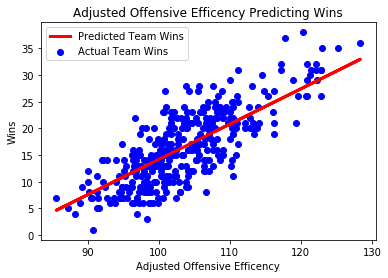

In [265]:
plt.scatter(X_test, Y_test, color = 'blue', label = 'Actual Team Wins')
plt.plot(X_test, W_pred_adjoe, color = 'red', linewidth = 3, label = 'Predicted Team Wins')
plt.xlabel('Adjusted Offensive Efficency')
plt.ylabel('Wins')
plt.legend()
plt.title('Adjusted Offensive Efficency Predicting Wins')
plt.show() # Graphing Predicted Wins vs Actual Wins

In [269]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, wins_pred_adjoe))) # Model RMSE

Root Mean Squared Error: 4.3031810950856775


### Predicting Wins with ADJDE 

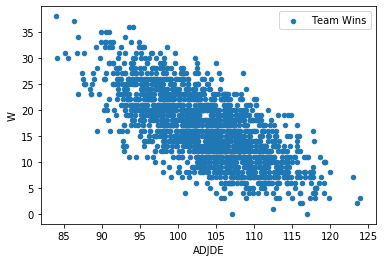

In [298]:
df3.plot.scatter(x = 'ADJDE', y = 'W', label = 'Team Wins') # Scatter plot to display on the same graph

In [280]:
lr_model2 = ols(formula='W~ADJDE', data=df3).fit()

lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     1602.
Date:                Fri, 27 Mar 2020   Prob (F-statistic):          2.11e-249
Time:                        06:34:25   Log-Likelihood:                -5224.0
No. Observations:                1757   AIC:                         1.045e+04
Df Residuals:                    1755   BIC:                         1.046e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     88.8411      1.811     49.060      0.000      85.289      92.393
ADJDE         -0.6985      0.017    -40.019      0.000      -0.733      -0.664
==============================================================================
Omnibus:                       11.263   Durbin-Watson:                   1.499
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                8.143
Skew:                           0.021   Prob(JB):                       0.0170
Kurtosis:                       2.669   Cond. No.                     1.66e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R Squared is 0.477**

In [281]:
X2 = df3['ADJDE'].values.reshape(-1,1)
Y2 = df3['W'].values.reshape(-1,1)

In [245]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=0) # 80% of data is used to train model and 20% used to test model

In [246]:
lr2 = LinearRegression()

In [247]:
lr2.fit(X2_train,Y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [248]:
print(lr2.coef_) 

[[-0.67870539]]


In [249]:
print(lr2.intercept_)

[86.77044974]


In [259]:
wins_pred_adjde = (lr2.predict(X2_test)) # Model predictied wins using test data
wins_pred_adjde_df = pd.DataFrame({'Actual_Wins': Y2_test.flatten(), 'Predicted_Wins': wins_pred_adjde.flatten()}) # Predicted wins and Actual wins into Data Frame
wins_pred_adjde_df

,Actual_Wins,Predicted_Wins
0,11,15.234902
1,16,18.967782
2,15,13.945362
3,25,21.071768
4,11,9.126553
...,...,...
347,6,10.076741
348,20,25.211871
349,19,12.655821
350,4,8.040625


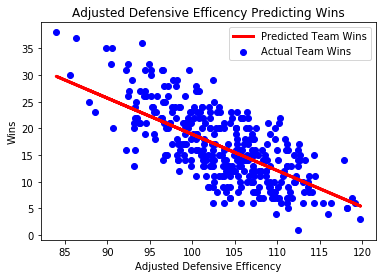

In [264]:
plt.scatter(X2_test, Y2_test, color = 'blue', label = 'Actual Team Wins')
plt.plot(X2_test, W_pred_adjde, color = 'red', linewidth = 3, label = 'Predicted Team Wins')
plt.xlabel('Adjusted Defensive Efficency')
plt.ylabel('Wins')
plt.legend()
plt.title('Adjusted Defensive Efficency Predicting Wins')
plt.show() # Graphing Predicted Wins vs Actual Wins

In [268]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y2_test, wins_pred_adjde))) # Model RMSE

Root Mean Squared Error: 4.863165183507496


### Predicting Wins with Turnover Rate 

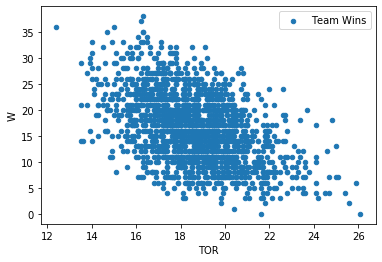

In [282]:
df3.plot.scatter(x = 'TOR', y = 'W', label = 'Team Wins') # Scatter plot to display on the same graph

In [283]:
lr_model3 = ols(formula='W~TOR', data=df3).fit()

lr_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.218
Method:                 Least Squares   F-statistic:                     489.7
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           6.63e-96
Time:                        06:34:53   Log-Likelihood:                -5577.4
No. Observations:                1757   AIC:                         1.116e+04
Df Residuals:                    1755   BIC:                         1.117e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     45.0527      1.297     34.735      0.000      42.509      47.597
TOR           -1.5350      0.069    -22.129      0.000      -1.671      -1.399
==============================================================================
Omnibus:                       24.657   Durbin-Watson:                   1.398
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.817
Skew:                           0.138   Prob(JB):                     0.000135
Kurtosis:                       2.591   Cond. No.                         176.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R Squared is 0.218**

In [236]:
X3 = df3['TOR'].values.reshape(-1,1)
Y3 = df3['W'].values.reshape(-1,1)

In [237]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, test_size=0.2, random_state=0) # 80% of data is used to train model and 20% used to test model

In [239]:
lr3 = LinearRegression()

In [240]:
lr3.fit(X3_train,Y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [242]:
print(lr3.coef_)

[[-1.48959017]]


In [291]:
print(lr3.intercept_)

[44.2158634]


In [258]:
wins_pred_tor = (lr3.predict(X3_test)) # Model predictied wins using test data
wins_pred_tor_df = pd.DataFrame({'Actual_Wins': Y3_test.flatten(), 'Predicted_Wins': wins_pred_tor.flatten()}) # Predicted wins and Actual wins into Data Frame
wins_pred_tor_df

,Actual_Wins,Predicted_Wins
0,11,14.275101
1,16,15.168855
2,15,15.168855
3,25,16.509486
4,11,13.232388
...,...,...
347,6,13.530306
348,20,14.275101
349,19,15.466773
350,4,17.254281


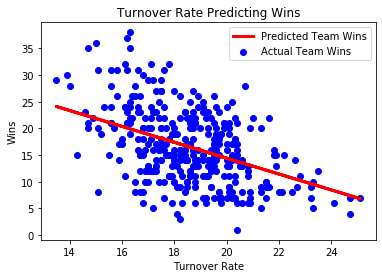

In [263]:
plt.scatter(X3_test, Y3_test, color = 'blue', label = 'Actual Team Wins')
plt.plot(X3_test, wins_pred_tor, color = 'red', linewidth = 3, label = 'Predicted Team Wins')
plt.xlabel('Turnover Rate')
plt.ylabel('Wins')
plt.legend()
plt.title('Turnover Rate Predicting Wins')
plt.show() # Graphing Predicted Wins vs Actual Wins

In [267]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y3_test, wins_pred_tor))) # Model RMSE

Root Mean Squared Error: 6.065027635986877


### Predicting Wins with Offensive Rebound Rate

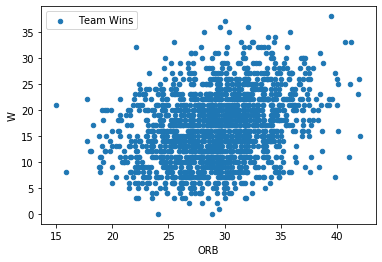

In [297]:
df3.plot.scatter(x = 'ORB', y = 'W', label = 'Team Wins') # Scatter plot to display on the same graph

In [284]:
lr_model4 = ols(formula='W~ORB', data=df3).fit()

lr_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.087
Method:                 Least Squares   F-statistic:                     169.0
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           5.80e-37
Time:                        06:35:10   Log-Likelihood:                -5712.8
No. Observations:                1757   AIC:                         1.143e+04
Df Residuals:                    1755   BIC:                         1.144e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.6658      1.076      2.479      0.013       0.556       4.775
ORB            0.4730      0.036     13.001      0.000       0.402       0.544
==============================================================================
Omnibus:                       20.893   Durbin-Watson:                   1.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.709
Skew:                           0.180   Prob(JB):                     0.000143
Kurtosis:                       2.665   Cond. No.                         213.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R Squared is 0.88**

In [285]:
X4 = df3['ORB'].values.reshape(-1,1)
Y4 = df3['W'].values.reshape(-1,1)

In [286]:
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, test_size=0.2, random_state=0) # 80% of data is used to train model and 20% used to test model

In [287]:
lr4 = LinearRegression()

In [288]:
lr4.fit(X4_train,Y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [289]:
print(lr4.coef_)

[[0.47889633]]


In [290]:
print(lr4.intercept_)

[2.50912348]


In [292]:
wins_pred_orb = (lr4.predict(X4_test)) # Model predictied wins using test data
wins_pred_orb_df = pd.DataFrame({'Actual_Wins': Y4_test.flatten(), 'Predicted_Wins': wins_pred_orb.flatten()}) # Predicted wins and Actual wins into Data Frame
wins_pred_orb_df

,Actual_Wins,Predicted_Wins
0,11,18.504261
1,16,17.546468
2,15,16.971793
3,25,17.211241
4,11,15.487214
...,...,...
347,6,15.056207
348,20,20.659295
349,19,15.151987
350,4,14.960428


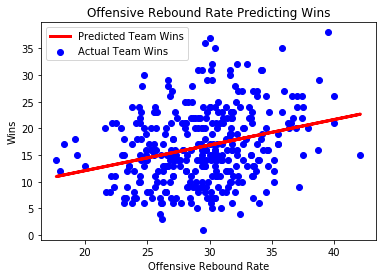

In [293]:
plt.scatter(X4_test, Y4_test, color = 'blue', label = 'Actual Team Wins')
plt.plot(X4_test, wins_pred_orb, color = 'red', linewidth = 3, label = 'Predicted Team Wins')
plt.xlabel('Offensive Rebound Rate')
plt.ylabel('Wins')
plt.legend()
plt.title('Offensive Rebound Rate Predicting Wins')
plt.show() # Graphing Predicted Wins vs Actual Wins

In [364]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y4_test, wins_pred_orb))) # Model RMSE

Root Mean Squared Error: 6.674453155558198


### Predicting Wins with Defensive Rebound Rate

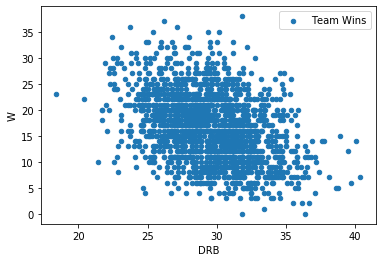

In [296]:
df3.plot.scatter(x = 'DRB', y = 'W', label = 'Team Wins') # Scatter plot to display on the same graph

In [300]:
lr_model5 = ols(formula='W~DRB', data=df3).fit()

lr_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.134
Method:                 Least Squares   F-statistic:                     272.7
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           4.73e-57
Time:                        06:43:13   Log-Likelihood:                -5666.7
No. Observations:                1757   AIC:                         1.134e+04
Df Residuals:                    1755   BIC:                         1.135e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.6151      1.407     28.165      0.000      36.856      42.374
DRB           -0.7840      0.047    -16.513      0.000      -0.877      -0.691
==============================================================================
Omnibus:                       25.191   Durbin-Watson:                   1.219
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.841
Skew:                           0.266   Prob(JB):                     4.04e-06
Kurtosis:                       2.762   Cond. No.                         287.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R Squared is 0.134** 

In [302]:
X5 = df3['DRB'].values.reshape(-1,1)
Y5 = df3['W'].values.reshape(-1,1)

In [303]:
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, test_size=0.2, random_state=0) # 80% of data is used to train model and 20% used to test model

In [304]:
lr5 = LinearRegression()

In [305]:
lr5.fit(X5_train,Y5_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [306]:
print(lr5.coef_)

[[-0.79485731]]


In [307]:
print(lr5.intercept_)

[39.97149885]


In [308]:
wins_pred_drb = (lr5.predict(X5_test)) # Model predictied wins using test data
wins_pred_drb_df = pd.DataFrame({'Actual_Wins': Y5_test.flatten(), 'Predicted_Wins': wins_pred_drb.flatten()}) # Predicted wins and Actual wins into Data Frame
wins_pred_drb_df

,Actual_Wins,Predicted_Wins
0,11,18.589837
1,16,15.728351
2,15,17.636008
3,25,22.246181
4,11,13.661722
...,...,...
347,6,17.079608
348,20,17.238580
349,19,15.410408
350,4,17.874466


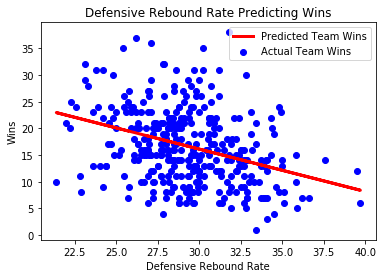

In [309]:
plt.scatter(X5_test, Y5_test, color = 'blue', label = 'Actual Team Wins')
plt.plot(X5_test, wins_pred_drb, color = 'red', linewidth = 3, label = 'Predicted Team Wins')
plt.xlabel('Defensive Rebound Rate')
plt.ylabel('Wins')
plt.legend()
plt.title('Defensive Rebound Rate Predicting Wins')
plt.show() # Graphing Predicted Wins vs Actual Wins

In [363]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y5_test, wins_pred_drb))) # Model RMSE

Root Mean Squared Error: 6.531243645774716


### Predicting Wins with Three Point Shooting Percentage

In [ ]:
df3.rename(columns = {'3PO': 'ThreePO'}, inplace = True) # Had to rename column to fit in model

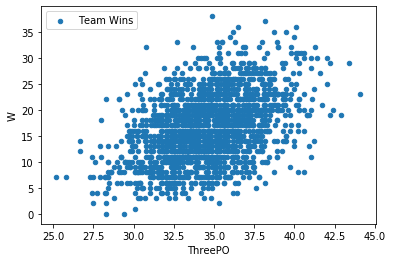

In [349]:
df3.plot.scatter(x = 'ThreePO', y = 'W', label = 'Team Wins') # Scatter plot to display on the same graph

In [351]:
lr_model6 = ols(formula='W~ThreePO', data=df3).fit()

lr_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.187
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     404.4
Date:                Fri, 27 Mar 2020   Prob (F-statistic):           4.19e-81
Time:                        07:01:23   Log-Likelihood:                -5611.4
No. Observations:                1757   AIC:                         1.123e+04
Df Residuals:                    1755   BIC:                         1.124e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.1874      1.781    -10.774      0.000     -22.680     -15.694
ThreePO        1.0329      0.051     20.109      0.000       0.932       1.134
==============================================================================
Omnibus:                       16.247   Durbin-Watson:                   1.307
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               15.653
Skew:                           0.201   Prob(JB):                     0.000399
Kurtosis:                       2.772   Cond. No.                         439.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R Squared is 0.187**

In [353]:
X6 = df3['ThreePO'].values.reshape(-1,1)
Y6 = df3['W'].values.reshape(-1,1)

In [354]:
X6_train, X6_test, Y6_train, Y6_test = train_test_split(X6, Y6, test_size=0.2, random_state=0) # 80% of data is used to train model and 20% used to test model

In [355]:
lr6 = LinearRegression()

In [356]:
lr6.fit(X6_train,Y6_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [357]:
print(lr6.coef_)

[[0.99161565]]


In [358]:
print(lr6.intercept_)

[-17.78653533]


In [359]:
wins_pred_3po = (lr6.predict(X6_test)) # Model predictied wins using test data
wins_pred_3po_df = pd.DataFrame({'Actual_Wins': Y6_test.flatten(), 'Predicted_Wins': wins_pred_3po.flatten()}) # Predicted wins and Actual wins into Data Frame
wins_pred_3po_df

,Actual_Wins,Predicted_Wins
0,11,13.945166
1,16,16.225882
2,15,14.540135
3,25,19.002405
4,11,14.639297
...,...,...
347,6,16.523366
348,20,15.730074
349,19,18.308274
350,4,14.044327


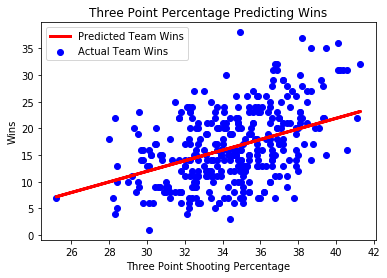

In [360]:
plt.scatter(X6_test, Y6_test, color = 'blue', label = 'Actual Team Wins')
plt.plot(X6_test, wins_pred_3po, color = 'red', linewidth = 3, label = 'Predicted Team Wins')
plt.xlabel('Three Point Shooting Percentage')
plt.ylabel('Wins')
plt.legend()
plt.title('Three Point Percentage Predicting Wins')
plt.show() # Graphing Predicted Wins vs Actual Wins

In [362]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y6_test, wins_pred_3po))) # Model RMSE

Root Mean Squared Error: 6.111328217791869


### Predicitng Wins Using Three Point Percentage Allowed

In [380]:
df3.rename(columns = {'3P_D': 'ThreePD'}, inplace = True) # Had to rename column to fit in model

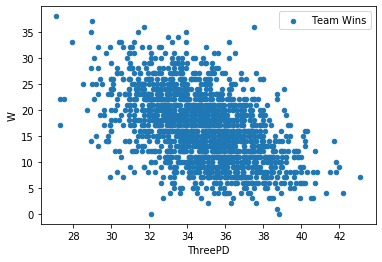

In [381]:
df3.plot.scatter(x = 'ThreePD', y = 'W', label = 'Team Wins') # Scatter plot to display on the same graph

In [382]:
lr_model7 = ols(formula='W~ThreePD', data=df3).fit()

lr_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     541.2
Date:                Fri, 27 Mar 2020   Prob (F-statistic):          1.44e-104
Time:                        07:14:19   Log-Likelihood:                -5557.5
No. Observations:                1757   AIC:                         1.112e+04
Df Residuals:                    1755   BIC:                         1.113e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     63.1058      2.007     31.436      0.000      59.169      67.043
ThreePD       -1.3410      0.058    -23.264      0.000      -1.454      -1.228
==============================================================================
Omnibus:                        5.311   Durbin-Watson:                   1.272
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                5.322
Skew:                           0.135   Prob(JB):                       0.0699
Kurtosis:                       2.989   Cond. No.                         512.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**R Squared is 0.236**

In [385]:
X7 = df3['ThreePD'].values.reshape(-1,1)
Y7 = df3['W'].values.reshape(-1,1)

In [386]:
X7_train, X7_test, Y7_train, Y7_test = train_test_split(X7, Y7, test_size=0.2, random_state=0) # 80% of data is used to train model and 20% used to test model

In [387]:
lr7 = LinearRegression()

In [388]:
lr7.fit(X7_train,Y7_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [389]:
print(lr7.coef_)

[[-1.2998649]]


In [390]:
print(lr7.intercept_)

[61.65365045]


In [391]:
wins_pred_3pd = (lr7.predict(X7_test)) # Model predictied wins using test data
wins_pred_3pd_df = pd.DataFrame({'Actual_Wins': Y7_test.flatten(), 'Predicted_Wins': wins_pred_3pd.flatten()}) # Predicted wins and Actual wins into Data Frame
wins_pred_3pd_df

,Actual_Wins,Predicted_Wins
0,11,14.078595
1,16,21.097866
2,15,10.698946
3,25,20.707906
4,11,14.468555
...,...,...
347,6,13.428663
348,20,16.548338
349,19,15.638433
350,4,7.969230


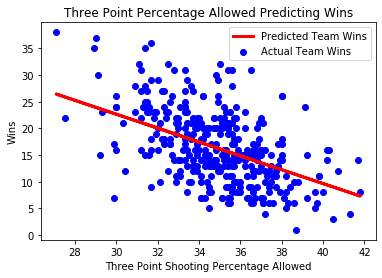

In [442]:
plt.scatter(X7_test, Y7_test, color = 'blue', label = 'Actual Team Wins')
plt.plot(X7_test, wins_pred_3pd, color = 'red', linewidth = 3, label = 'Predicted Team Wins')
plt.xlabel('Three Point Shooting Percentage Allowed')
plt.ylabel('Wins')
plt.legend()
plt.title('Three Point Percentage Allowed Predicting Wins')
plt.show() # Graphing Predicted Wins vs Actual Wins

In [393]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y7_test, wins_pred_3pd))) # Model RMSE

Root Mean Squared Error: 5.900088453357733


## Multiple Linear Regression

In [397]:
X8 = df3[['ADJOE', 'ADJDE', 'TOR', 'ORB', 'DRB', 'ThreePO', 'ThreePD']]
Y8 = df3['W']

In [409]:
X8_train, X8_test, Y8_train, Y8_test = train_test_split(X8, Y8, test_size=0.2, random_state=0) # 80% of data is used to train model and 20% used to test model

In [410]:
f = 'W~ADJOE+ADJDE+TOR+ORB+DRB+ThreePO+ThreePD'

In [411]:
lr_model8 = ols(formula=f, data=df3).fit()

lr_model8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      W   R-squared:                       0.754
Model:                            OLS   Adj. R-squared:                  0.753
Method:                 Least Squares   F-statistic:                     767.0
Date:                Fri, 27 Mar 2020   Prob (F-statistic):               0.00
Time:                        07:26:49   Log-Likelihood:                -4560.6
No. Observations:                1757   AIC:                             9137.
Df Residuals:                    1749   BIC:                             9181.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     31.3428      3.231      9.702      0.000      25.007      37.679
ADJOE          0.2938      0.022     13.597      0.000       0.251       0.336
ADJDE         -0.2725      0.019    -14.506      0.000      -0.309      -0.236
TOR           -0.4604      0.054     -8.478      0.000      -0.567      -0.354
ORB            0.2102      0.023      8.982      0.000       0.164       0.256
DRB           -0.2251      0.028     -8.030      0.000      -0.280      -0.170
ThreePO        0.3854      0.040      9.596      0.000       0.307       0.464
ThreePD       -0.6136      0.041    -15.107      0.000      -0.693      -0.534
==============================================================================
Omnibus:                        7.136   Durbin-Watson:                   1.431
Prob(Omnibus):                  0.028   Jarque-Bera (JB):                6.817
Skew:                           0.120   Prob(JB):                       0.0331
Kurtosis:                       2.811   Cond. No.                     6.71e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.71e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**R Squared is 0.754**

In [412]:
lr8 = LinearRegression()

In [413]:
lr8.fit(X8_train, Y8_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [414]:
lr8.coef_

array([ 0.28361584, -0.27145934, -0.48657826,  0.20266142, -0.2520664 ,
        0.38203087, -0.61086233])

In [415]:
lr8.intercept_

33.804836574491965

In [416]:
wins_pred = lr8.predict(X8_test)

In [418]:
wins_pred_df = pd.DataFrame({'Actual_Wins': Y8_test, 'Wins_Predicted': wins_pred})

In [419]:
wins_pred_df

,Actual_Wins,Wins_Predicted
1379,11,13.147968
668,16,17.513891
412,15,11.067908
558,25,25.291851
1363,11,6.869229
...,...,...
554,6,9.704795
1579,20,22.873568
969,19,16.775359
539,4,6.287189


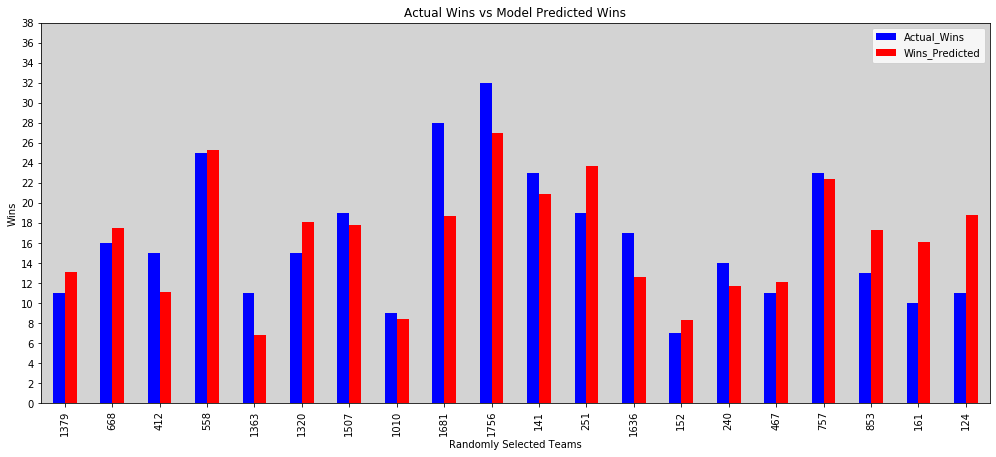

In [439]:
ax = wins_pred_df.head(20).plot(kind = 'bar', figsize = (17,7), color = ('blue', 'red'))
plt.yticks(np.arange(0, 39, step=2))
plt.xlabel('Randomly Selected Teams')
plt.ylabel('Wins')
plt.title('Actual Wins vs Model Predicted Wins')
ax.set_facecolor("lightgrey")

In [443]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y8_test, wins_pred))) # Model RMSE

Root Mean Squared Error: 3.439632049719883
